In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from datetime import datetime


In [26]:
df = pd.read_csv(r'trending_by_time.csv')


In [27]:
df

,record_id,region,trending_date,category_title,videos_count
0,1,France,2017-11-14 00:00:00.000000,Autos & Vehicles,8
1,2,France,2017-11-15 00:00:00.000000,Autos & Vehicles,2
2,3,France,2017-11-16 00:00:00.000000,Autos & Vehicles,6
3,4,France,2017-11-17 00:00:00.000000,Autos & Vehicles,8
4,5,France,2017-11-18 00:00:00.000000,Autos & Vehicles,4
...,...,...,...,...,...
12338,12339,United States,2018-06-10 00:00:00.000000,Travel & Events,2
12339,12340,United States,2018-06-11 00:00:00.000000,Travel & Events,2
12340,12341,United States,2018-06-12 00:00:00.000000,Travel & Events,2
12341,12342,United States,2018-06-13 00:00:00.000000,Travel & Events,2


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12343 entries, 0 to 12342
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   record_id       12343 non-null  int64 
 1   region          12343 non-null  object
 2   trending_date   12343 non-null  object
 3   category_title  12343 non-null  object
 4   videos_count    12343 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 482.3+ KB


In [33]:
df.trending_date = pd.to_datetime(df.trending_date)
df.trending_date = df.trending_date.dt.floor('1D')
df['month'] = df.trending_date.dt.strftime('%Y-%m')
df


,record_id,region,trending_date,category_title,videos_count,month
0,1,France,2017-11-14,Autos & Vehicles,8,2017-11
1,2,France,2017-11-15,Autos & Vehicles,2,2017-11
2,3,France,2017-11-16,Autos & Vehicles,6,2017-11
3,4,France,2017-11-17,Autos & Vehicles,8,2017-11
4,5,France,2017-11-18,Autos & Vehicles,4,2017-11
...,...,...,...,...,...,...
12338,12339,United States,2018-06-10,Travel & Events,2,2018-06
12339,12340,United States,2018-06-11,Travel & Events,2,2018-06
12340,12341,United States,2018-06-12,Travel & Events,2,2018-06
12341,12342,United States,2018-06-13,Travel & Events,2,2018-06


In [42]:
date = df.groupby(['month', 'category_title'])['videos_count'].count().reset_index()
date

,month,category_title,videos_count
0,2017-11,Autos & Vehicles,59
1,2017-11,Comedy,68
2,2017-11,Education,68
3,2017-11,Entertainment,68
4,2017-11,Film & Animation,68
...,...,...,...
126,2018-06,Pets & Animals,51
127,2018-06,Science & Technology,66
128,2018-06,Shows,38
129,2018-06,Sports,67


In [39]:
event_pivot = pd.pivot_table(df,
                             values='videos_count',
                             index='month',
                             columns='category_title',
                             aggfunc='sum').pct_change().fillna(0)

event_pivot

category_title,Autos & Vehicles,Comedy,Education,Entertainment,Film & Animation,Gaming,Howto & Style,Movies,Music,News & Politics,Nonprofits & Activism,People & Blogs,Pets & Animals,Science & Technology,Shows,Sports,Trailers,Travel & Events
month,,,,,,,,,,,,,,,,,,
2017-11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2017-12,0.434932,0.848413,0.661458,0.928614,0.869393,1.067265,0.761518,0.000000,0.915094,0.783898,12.000000,0.964706,1.036364,0.337423,0.370968,0.717647,0.0,0.984375
2018-01,-0.140811,-0.177759,0.001567,-0.131640,-0.154552,0.132321,-0.028462,0.000000,-0.055979,-0.036025,0.230769,-0.086669,0.343750,0.016820,-0.411765,0.166952,0.0,0.023622
2018-02,0.455556,-0.043864,-0.010955,0.117532,0.064274,0.000000,0.142518,0.000000,0.055977,0.006571,-0.125000,0.143892,0.694352,0.210526,0.140000,0.153338,0.0,0.107692
2018-03,-0.188931,0.145822,0.172468,0.181934,0.184314,0.839080,0.223839,0.000000,0.156783,0.141167,0.000000,0.113424,0.021569,-0.007453,-0.280702,0.036896,0.0,0.187500
2018-04,-0.272941,-0.113918,-0.352227,-0.182690,-0.206623,-0.535417,-0.264439,0.666667,-0.115340,-0.237040,0.000000,-0.164454,-0.268714,-0.352941,0.365854,-0.112270,0.0,-0.315789
2018-05,0.249191,0.248521,0.172917,0.396663,0.357262,0.432735,0.207082,0.200000,0.346356,0.176664,-0.642857,0.043774,0.370079,0.477756,1.678571,0.252246,0.0,-0.102564
2018-06,-0.559585,-0.516588,-0.548845,-0.537142,-0.508610,-0.325509,-0.563138,1.333333,-0.497229,-0.669056,-0.200000,-0.579062,-0.452107,-0.642670,-0.640000,-0.552428,0.0,-0.552381


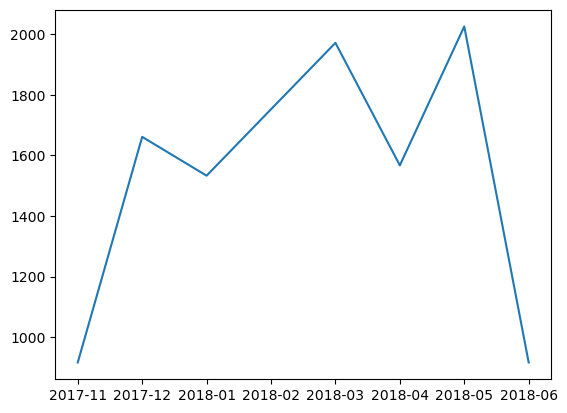

In [38]:
plt.plot(date['month'], date['videos_count'])

<AxesSubplot:>

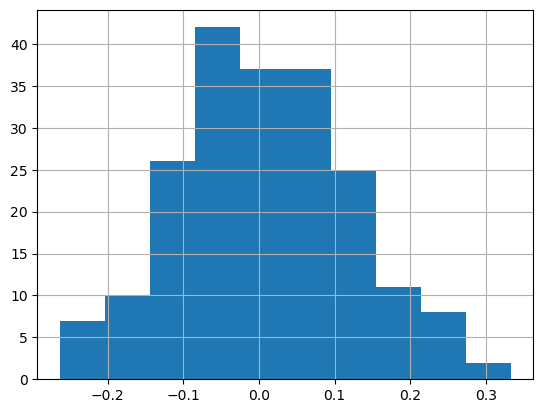

In [ ]:
event_pivot.Comedy.hist()

<AxesSubplot:>

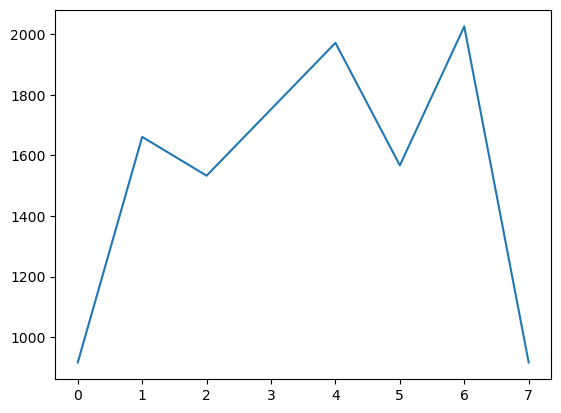

In [40]:
date.videos_count.plot()

<AxesSubplot:xlabel='month', ylabel='videos_count'>

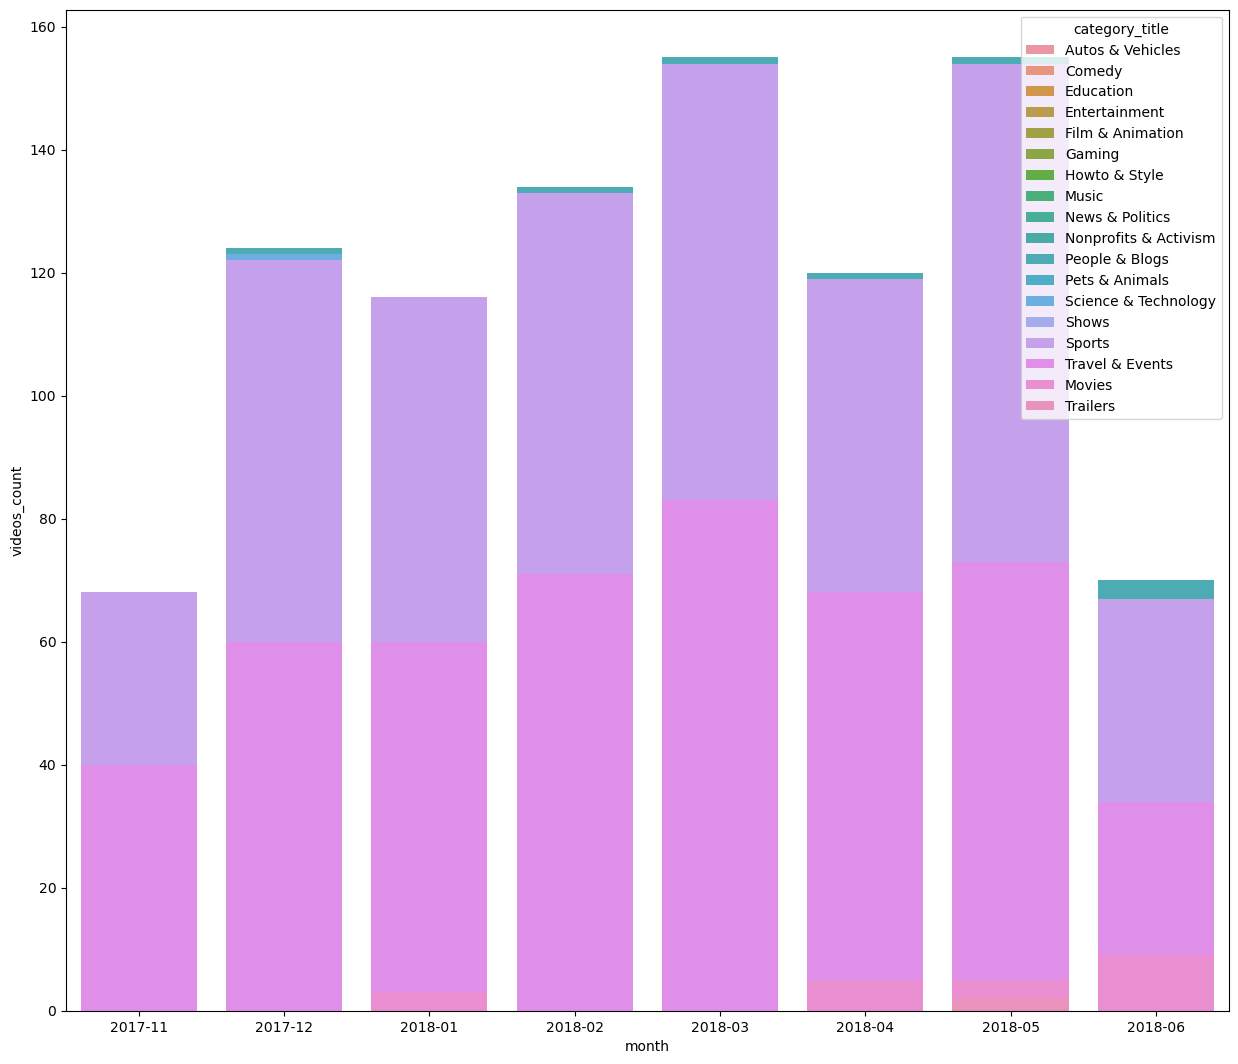

In [46]:
plt.figure(figsize=(15, 13))
sns.barplot(data=date, x='month', y='videos_count', hue='category_title', dodge=False)